<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc" style="margin-top: 1em;"><ul class="toc-item"></ul></div>

In [1]:
from apps.lib import Sensor, Performance, Model
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

SONG = 4
TRAIN_ORDER = 3

In [2]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [3]:
sensor_data = Sensor(verbose=1)

15:19:20 INFO << load arm CSV.
15:19:20 INFO << load drummer CSV.


In [4]:
def gogo(who_id, song_id, train_pf_order):
    train_pf = Performance(sensor_data, who_id, song_id, train_pf_order, 2, 2)
    
    pfs = []
    for pf_order in tqdm(range(1, 3 + 1)):
        if pf_order == train_pf_order:
            pfs.append(train_pf)
        else:
            pfs.append(Performance(sensor_data, who_id, song_id, pf_order, 2, 2)) 
            
    return pfs

In [5]:
pfs = []
for drumer in range(1, 8 + 1):
    ppf = gogo(drumer, SONG, TRAIN_ORDER)
    pfs.append(ppf)

100%|██████████| 3/3 [00:44<00:00, 14.67s/it]


15:27:54 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000
15:27:54 DEBUG << findfont: Matching :family=sans-serif:style=normal:variant=normal:weight=normal:stretch=normal:size=12.0 to DejaVu Sans ('/usr/bin/anaconda3/lib/python3.6/site-packages/matplotlib/mpl-data/fonts/ttf/DejaVuSans.ttf') with score of 0.050000


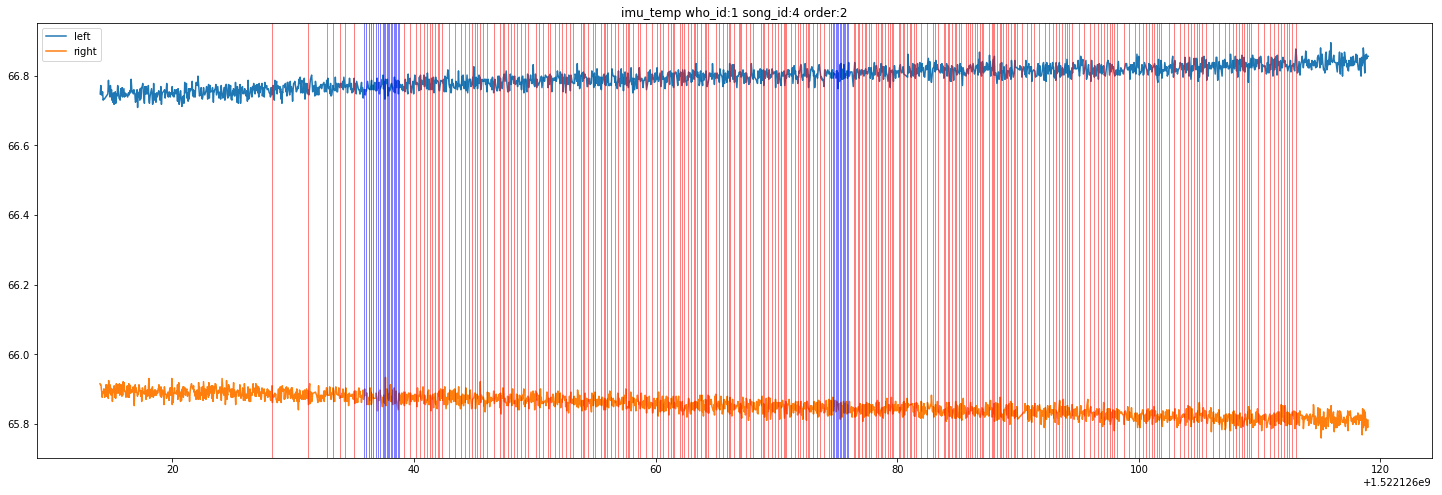

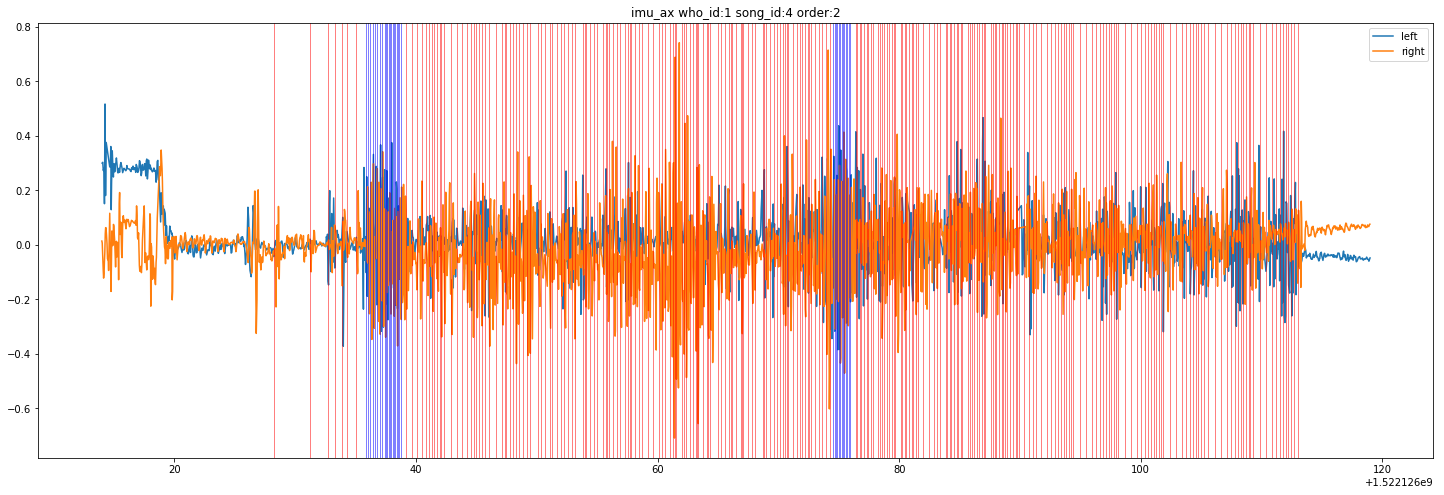

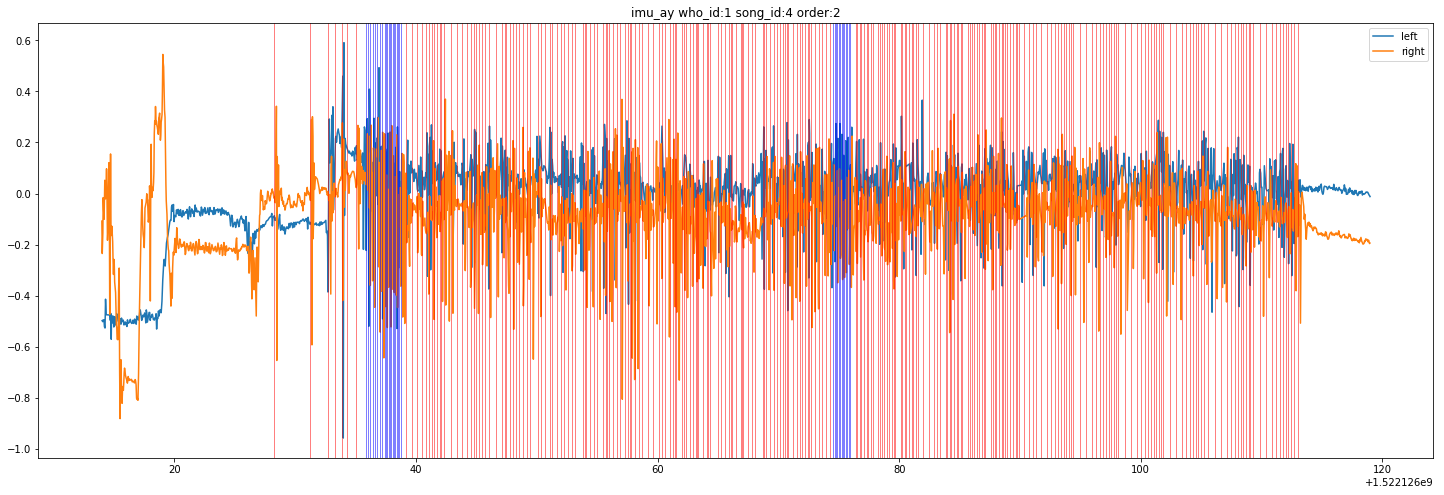

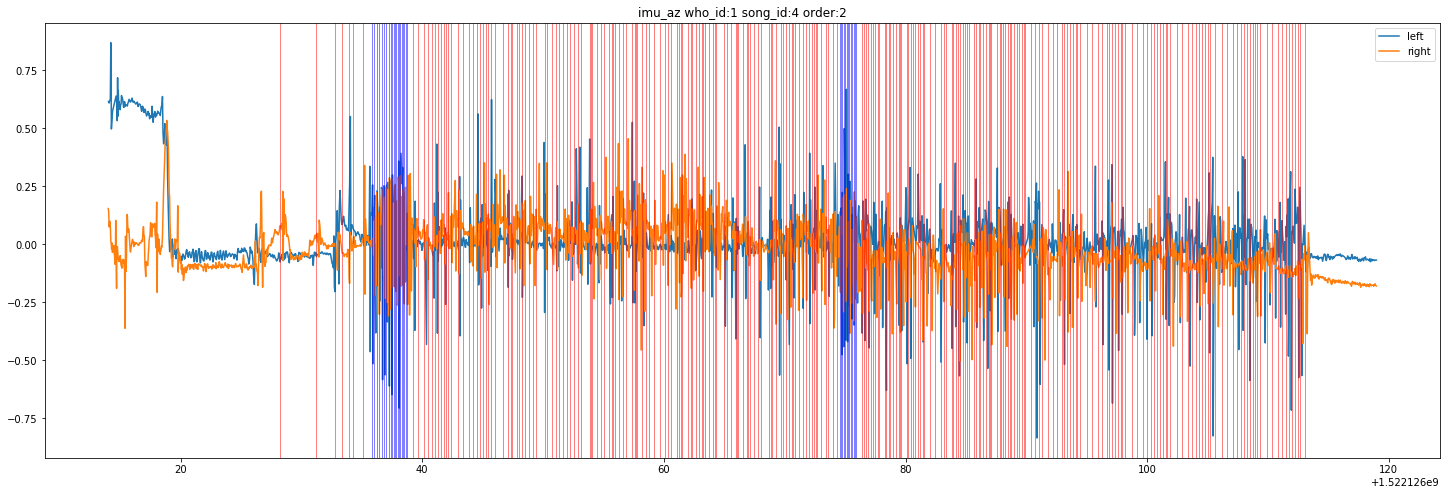

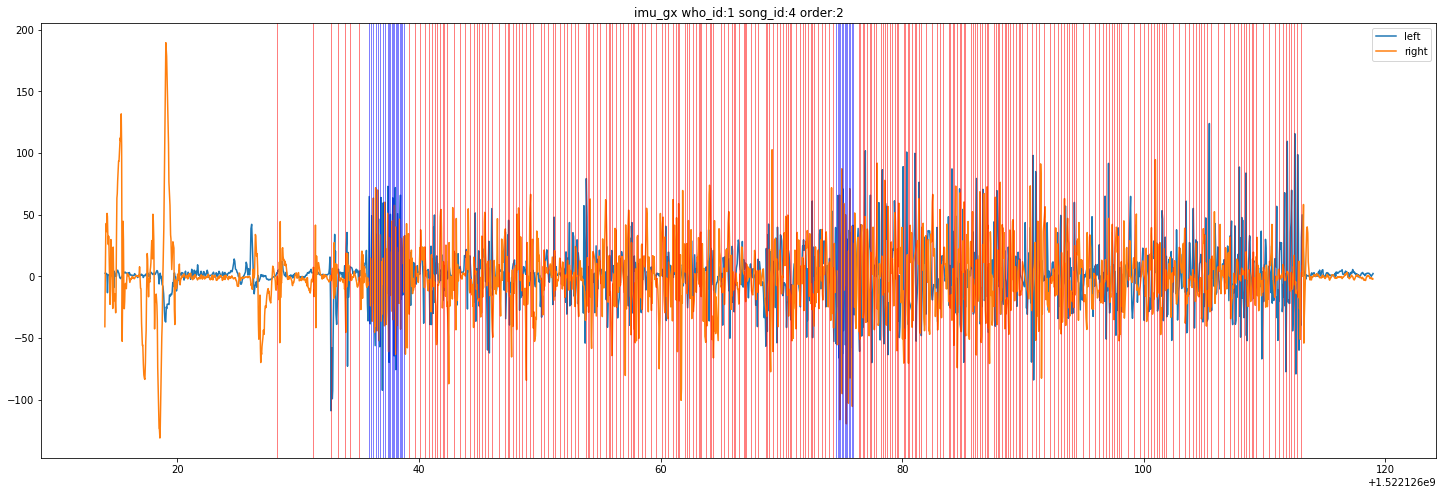

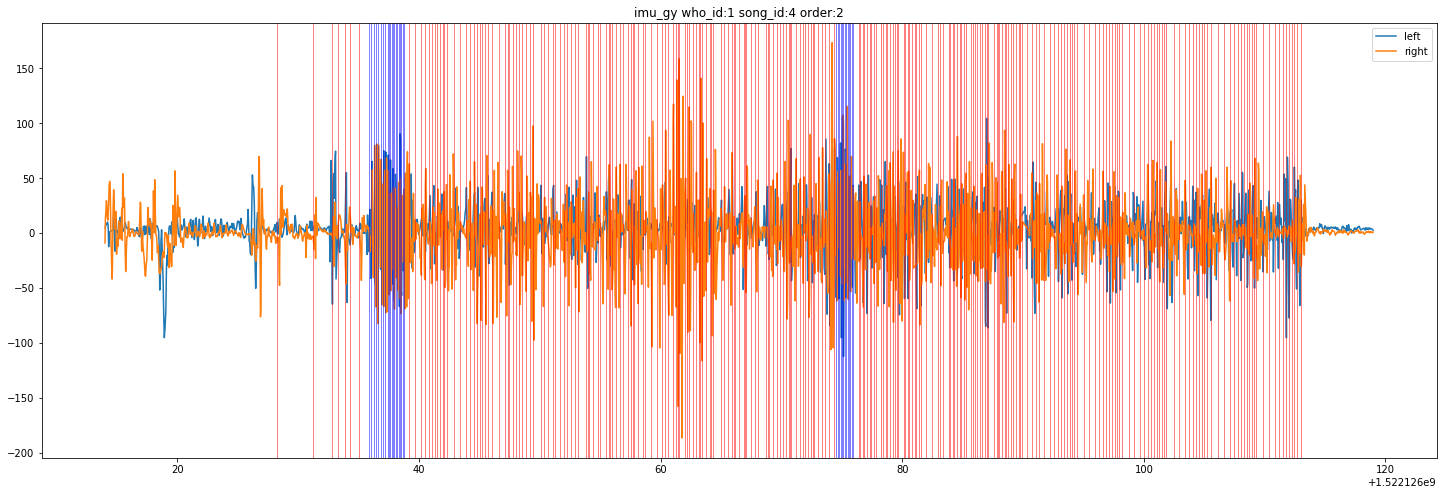

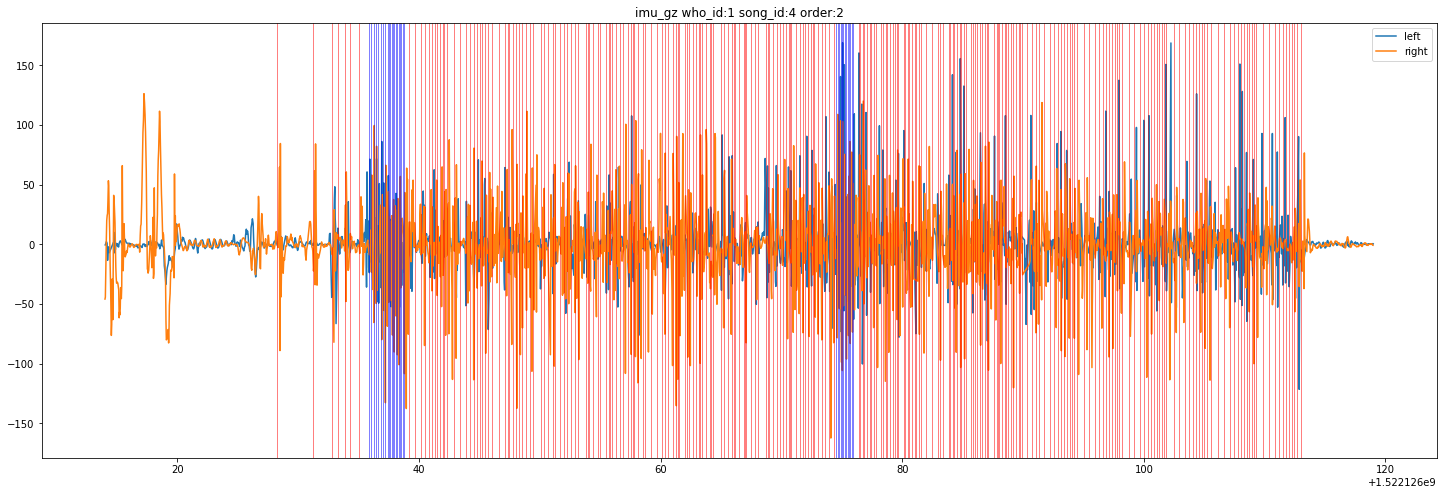

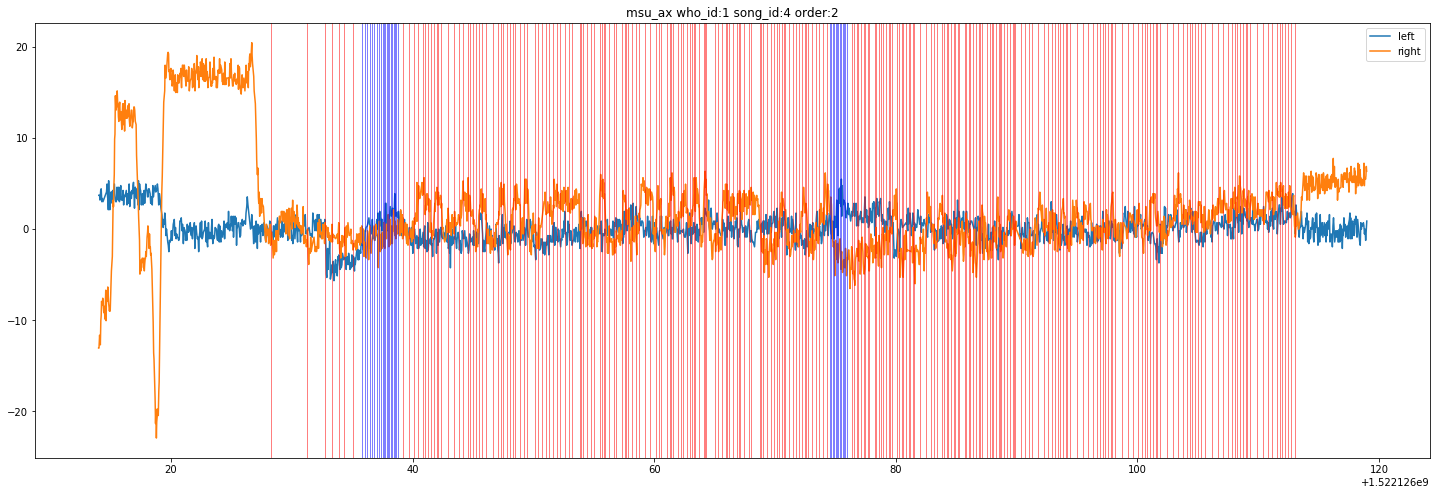

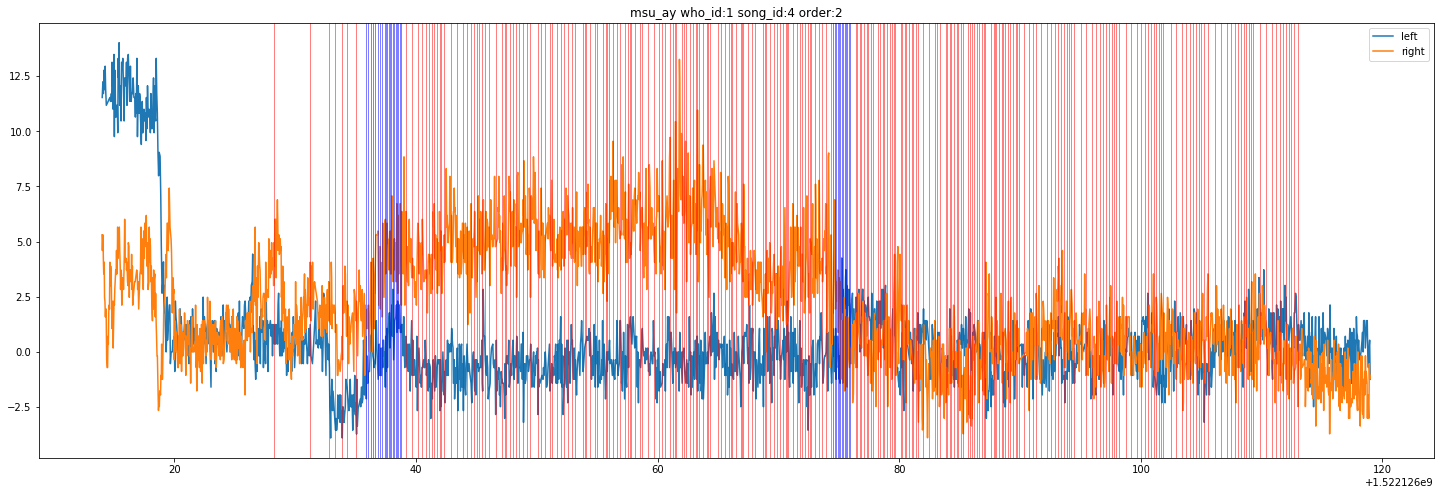

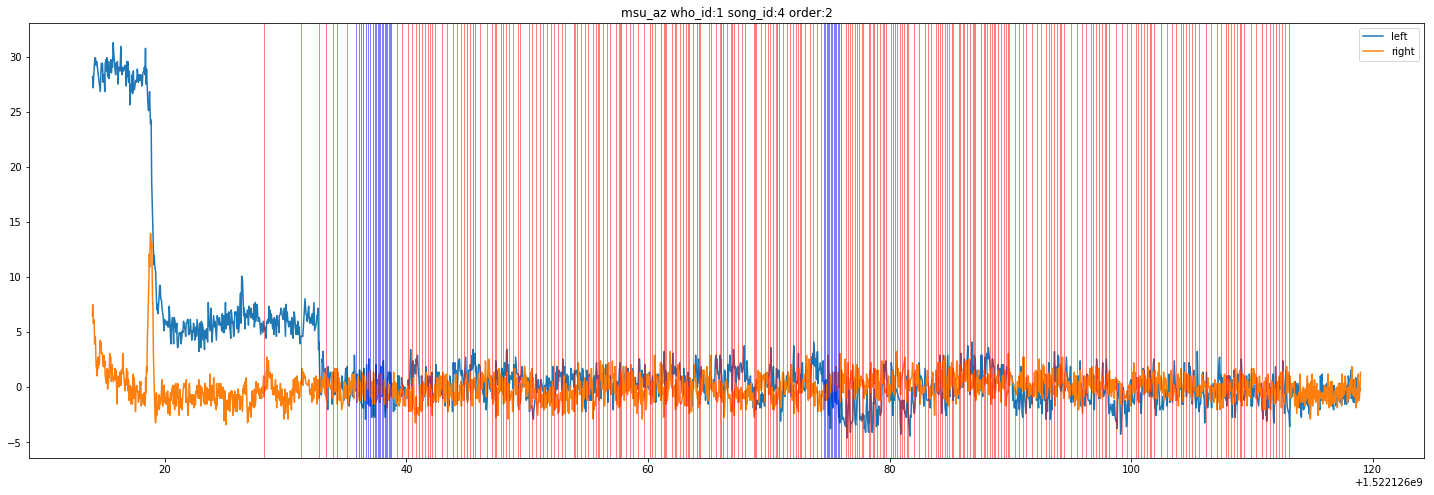

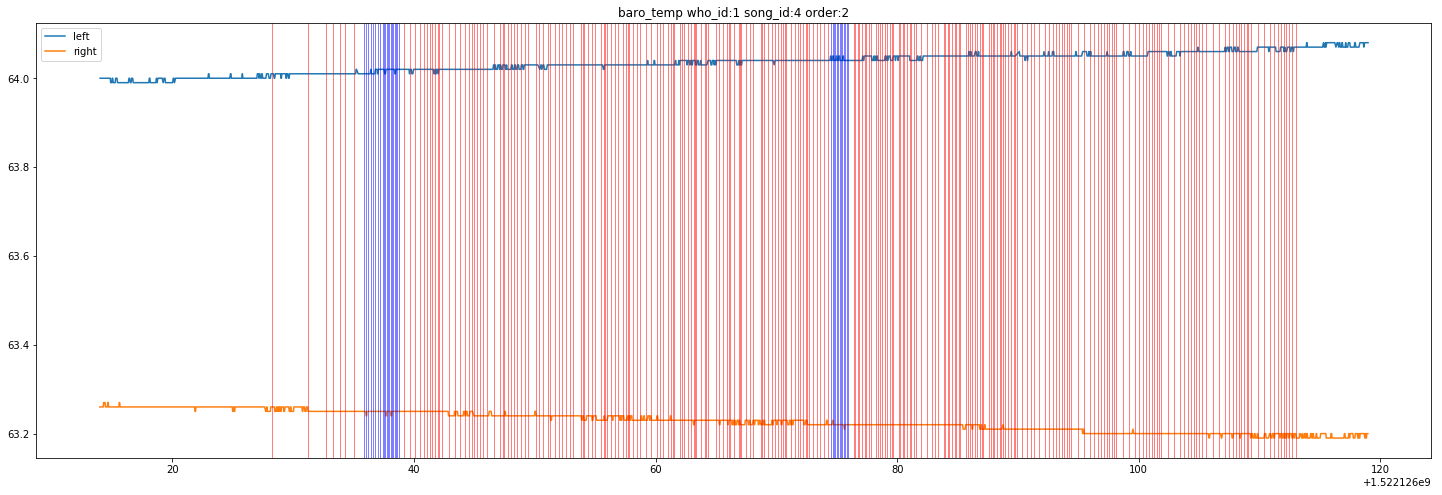

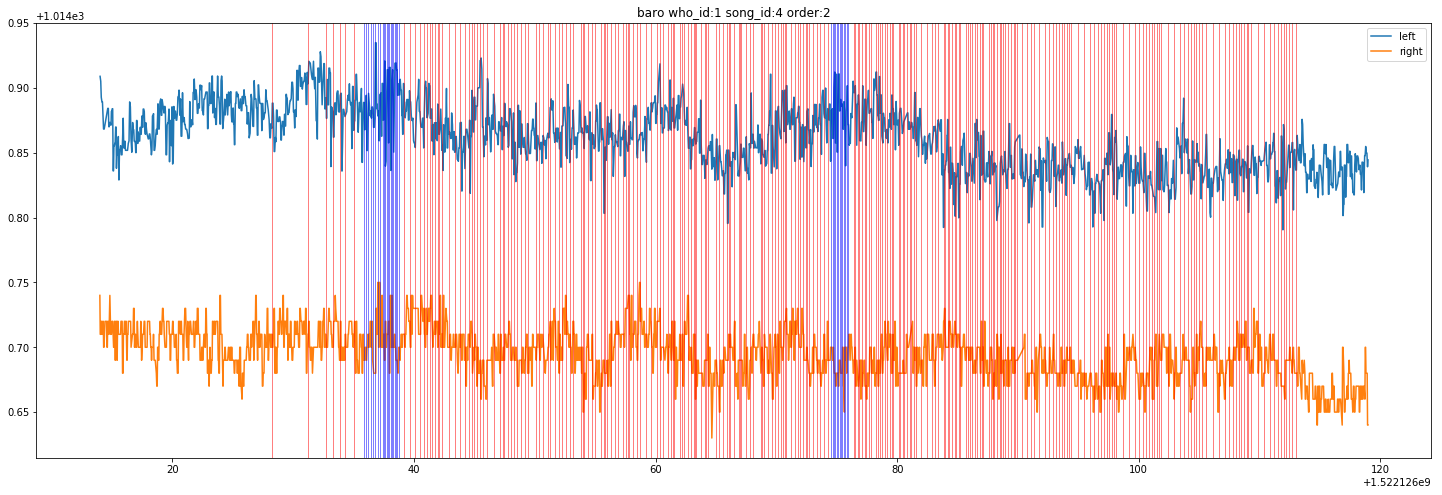

In [6]:
pfs[0][1].plot_global_event()

In [7]:
pfs[0][1].primitive_df

,L_AAI,L_AVI,L_ASMA,L_GAI,L_GVI,L_GSMA,L_AAE,L_ARE,L_MAMI,L_MGMI,...,R_AZCR,R_GZCR,R_AMCR,R_GMCR,R_AXYCORR,R_AYZCORR,R_AZXCORR,R_GXYCORR,R_GYZCORR,R_GZXCORR
0,0.879981,0.005259,1.431200,10.566887,30.555119,15.972000,0.779627,142.214220,0.845396,8.872327,...,0.285714,0.428571,0.428571,0.285714,-0.602559,-0.538046,0.581464,0.793017,0.600883,0.890746
1,0.808236,0.006410,1.365333,9.532677,5.494612,12.721000,0.659655,96.366543,0.835240,8.866685,...,0.333333,0.333333,0.333333,0.333333,-0.259237,-0.237481,-0.431832,-0.710140,-0.658739,0.930680
2,0.844290,0.002803,1.390167,13.586320,89.309535,18.645833,0.715629,273.897625,0.849880,11.631955,...,0.750000,0.500000,0.750000,0.500000,-0.014709,0.215202,-0.589072,0.462390,0.209243,-0.691486
3,0.831860,0.000208,1.379857,7.388830,12.969045,9.343143,0.692198,67.563856,0.835433,5.438242,...,0.500000,0.166667,0.500000,0.166667,-0.396944,0.246862,0.540891,-0.602023,0.921837,-0.842133
4,0.836290,0.000419,1.395333,8.965989,15.083840,12.009167,0.699800,95.472801,0.838436,8.290416,...,0.142857,0.285714,0.142857,0.428571,-0.696394,-0.347635,0.490667,0.077628,0.589958,0.317942
5,0.830508,0.000030,1.378400,4.185678,0.421803,5.605000,0.689773,17.941706,0.831294,4.342818,...,0.166667,0.166667,0.166667,0.166667,-0.179277,-0.293078,0.668523,-0.012867,-0.372427,-0.919634
6,0.839335,0.000015,1.394400,7.708533,5.425155,11.992400,0.704498,64.846629,0.839222,8.413739,...,0.428571,0.428571,0.142857,0.428571,0.584956,0.655333,-0.200879,-0.854344,0.747187,-0.383074
7,0.849520,0.000023,1.407000,4.693026,1.002103,7.004500,0.721708,23.026599,0.848091,4.852174,...,0.333333,0.500000,0.333333,0.500000,0.318479,-0.096813,-0.726244,-0.008947,0.885297,0.196201
8,0.845145,0.000038,1.403500,3.950051,0.092832,5.686250,0.714308,15.695734,0.842979,3.918997,...,0.500000,0.333333,0.500000,0.166667,0.176940,0.632137,-0.062491,0.782029,0.895043,0.831336
9,0.834139,0.000010,1.382333,3.182061,0.184306,4.328333,0.695798,10.309816,0.834336,3.031307,...,0.714286,0.285714,0.571429,0.285714,0.230235,-0.595491,-0.796003,0.931981,0.962615,0.902353


In [8]:
def cutstom_output_cnf_matrix(y, pred_y):
    cnf_matrix = confusion_matrix(y, pred_y)
    
    # Plot normalized confusion matrix
    plt.figure(figsize=(10, 10))
    plot_confusion_matrix(cnf_matrix, classes=[1, 2], normalize=True,
                          title='Normalized confusion matrix')
    plt.show()

!!!!!!!!! test 1-th drumer !!!!!!!!!!!!
[[ 2.68896726 -0.67181284  2.71257359 ... -1.61893007  1.15375608
  -1.40648895]
 [ 2.68790322 -0.67092923  2.71793356 ... -1.52798568  0.05656788
  -0.46374968]
 [ 2.70856284 -0.66919852  2.73003672 ... -1.48075341  0.16936275
   0.27486431]
 ...
 [ 2.27169269 -0.67239152  1.87503506 ...  0.5601273   1.29324286
  -0.19248468]
 [ 2.28092951 -0.67220008  1.86466093 ... -0.15835313  1.18795126
   0.50535645]
 [ 2.27905781 -0.67206372  1.8778015  ... -1.54411441  0.67907892
  -1.20680733]]


100%|██████████| 704/704 [00:56<00:00, 12.53it/s]


let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance


100%|██████████| 704/704 [00:56<00:00, 12.43it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.88389513 0.11610487]
 [0.76470588 0.23529412]]


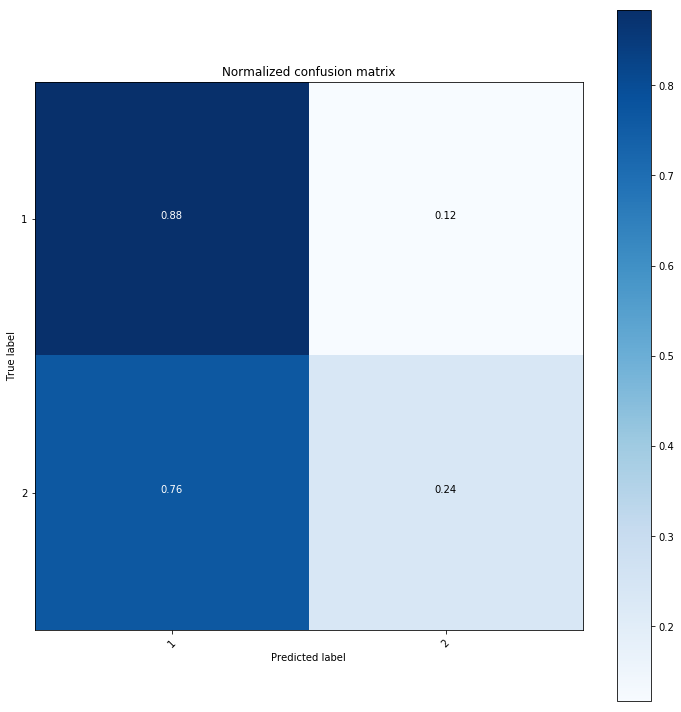

predicting 2 performance


100%|██████████| 704/704 [00:56<00:00, 12.49it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.9588015  0.0411985 ]
 [0.73529412 0.26470588]]


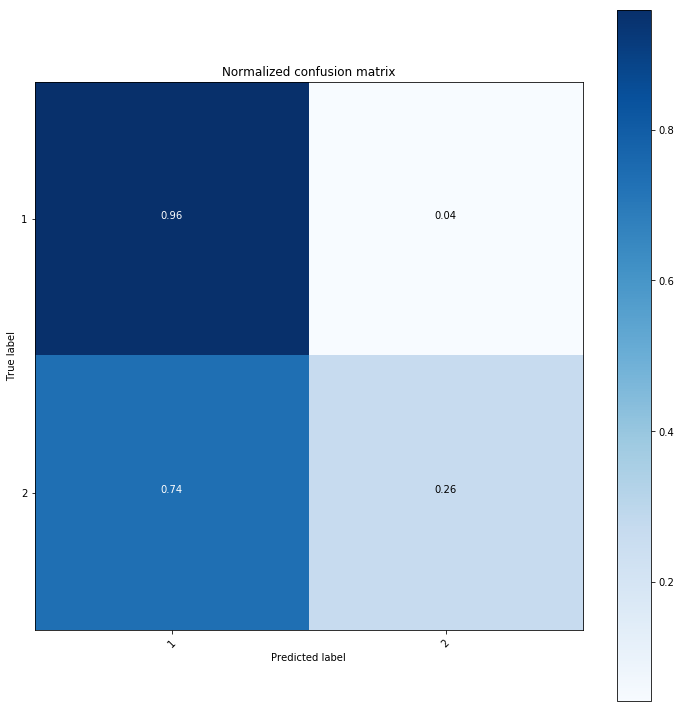

predicting 3 performance


100%|██████████| 704/704 [00:56<00:00, 12.51it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98876404 0.01123596]
 [0.02941176 0.97058824]]


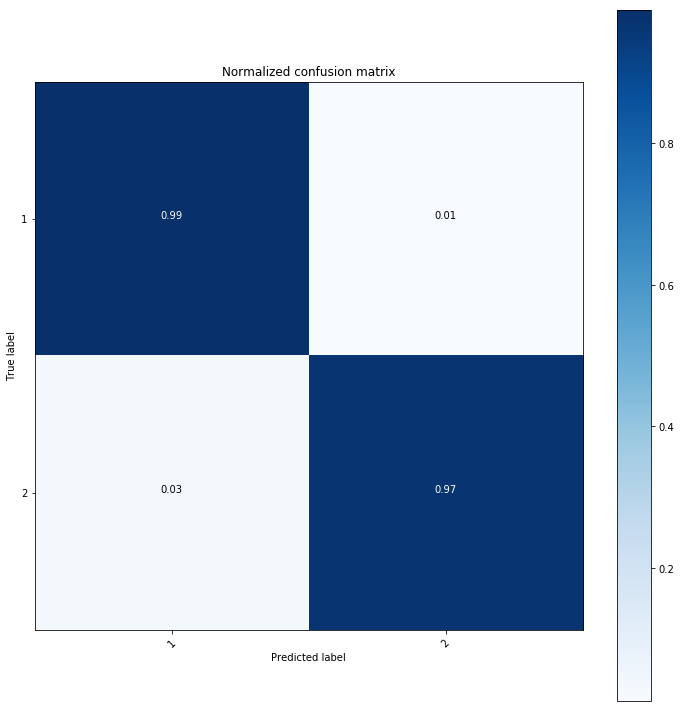

!!!!!!!!! test 2-th drumer !!!!!!!!!!!!
[[ 1.03239187 -0.02534894  0.86279892 ...  0.54740622  0.16227465
   0.90890035]
 [ 0.68944277 -0.31963323  0.67675709 ...  1.77914612  2.11230018
   0.85718199]
 [ 0.08102211 -0.22147712  0.1606145  ... -1.18149744 -1.04172224
   0.95500162]
 ...
 [ 0.57984437  0.6034945   0.55821717 ...  1.88482932 -1.17460344
  -2.13724949]
 [ 0.02345538 -0.19741083 -0.01904757 ...  1.35876378  0.11891728
  -2.14233154]
 [-0.25218208 -0.41296841 -0.32260033 ...  1.3998121  -0.91267701
  -1.97049488]]


100%|██████████| 704/704 [00:56<00:00, 12.53it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 704/704 [00:56<00:00, 12.51it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97752809 0.02247191]
 [0.11764706 0.88235294]]


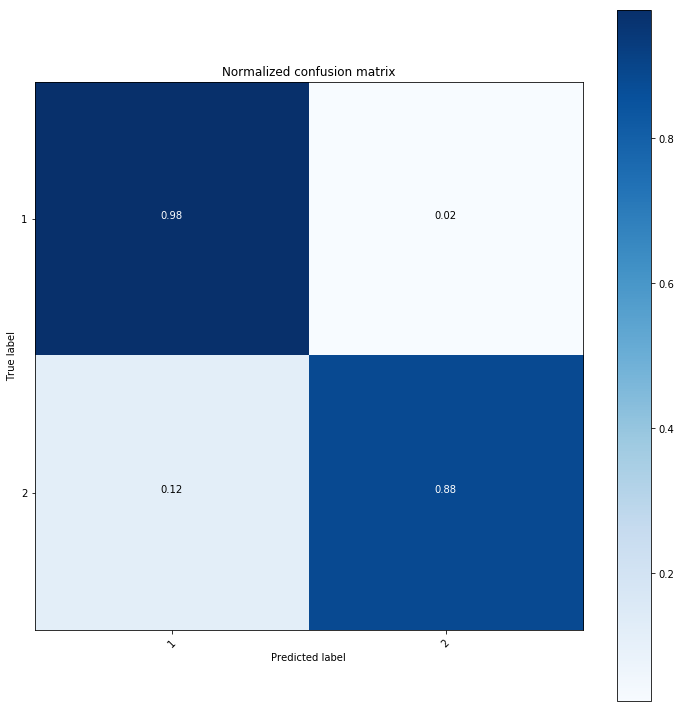

predicting 2 performance


100%|██████████| 704/704 [00:56<00:00, 12.44it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.83520599 0.16479401]
 [0.17647059 0.82352941]]


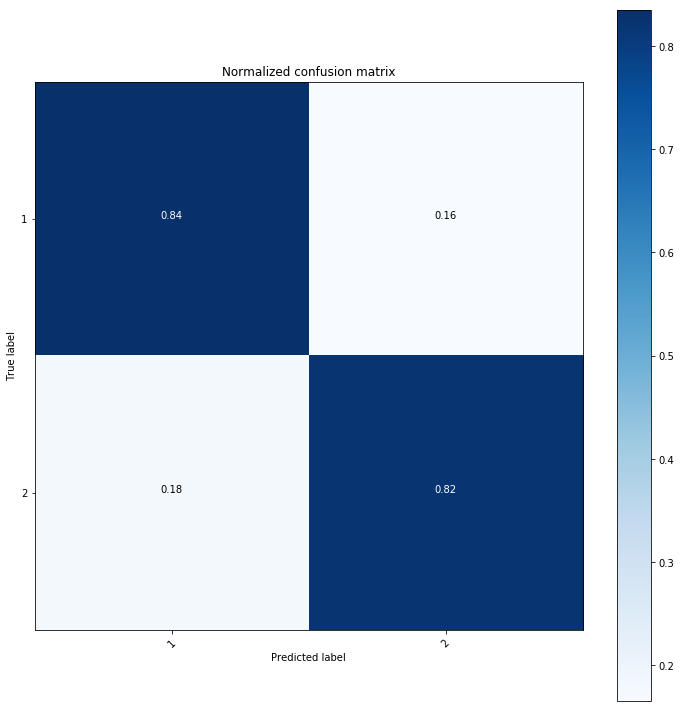

predicting 3 performance


100%|██████████| 704/704 [00:56<00:00, 12.48it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


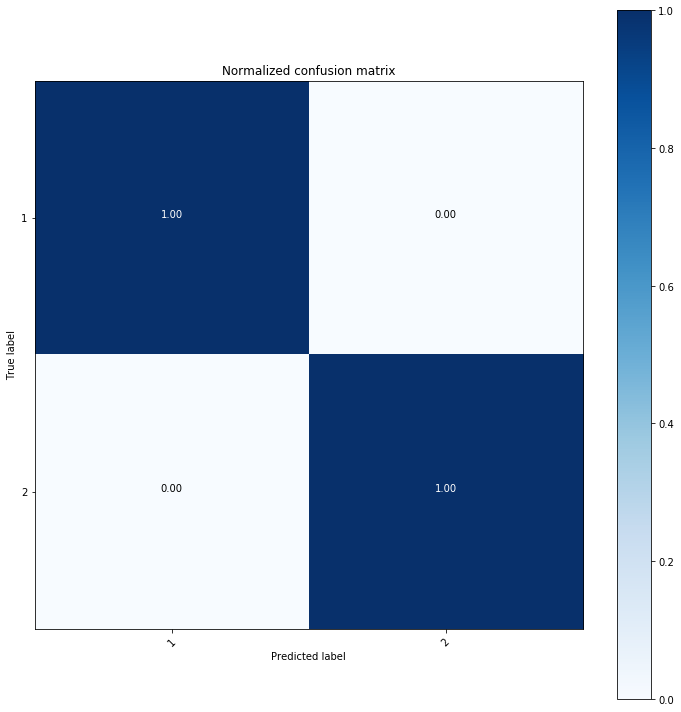

!!!!!!!!! test 3-th drumer !!!!!!!!!!!!
[[ 1.04756108 -0.53077162  1.31830384 ...  1.53913236 -0.46150488
  -1.23662789]
 [ 1.03799573 -0.52967284  1.3056025  ...  1.1814485  -1.42923201
  -1.10936011]
 [ 1.01387456 -0.5301114   1.28106189 ...  0.7203201  -1.44012275
  -0.61262572]
 ...
 [-1.44195797 -0.5303234  -1.42001382 ... -0.96377503 -1.29318646
   1.25840874]
 [-1.44365377 -0.53081825 -1.42653116 ... -0.66850757  0.99334602
  -1.60241178]
 [-1.47964883 -0.53066296 -1.47613537 ...  1.00179946  1.19418238
   0.0783721 ]]


100%|██████████| 704/704 [00:57<00:00, 12.31it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 704/704 [00:56<00:00, 12.36it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.69662921 0.30337079]
 [0.82352941 0.17647059]]


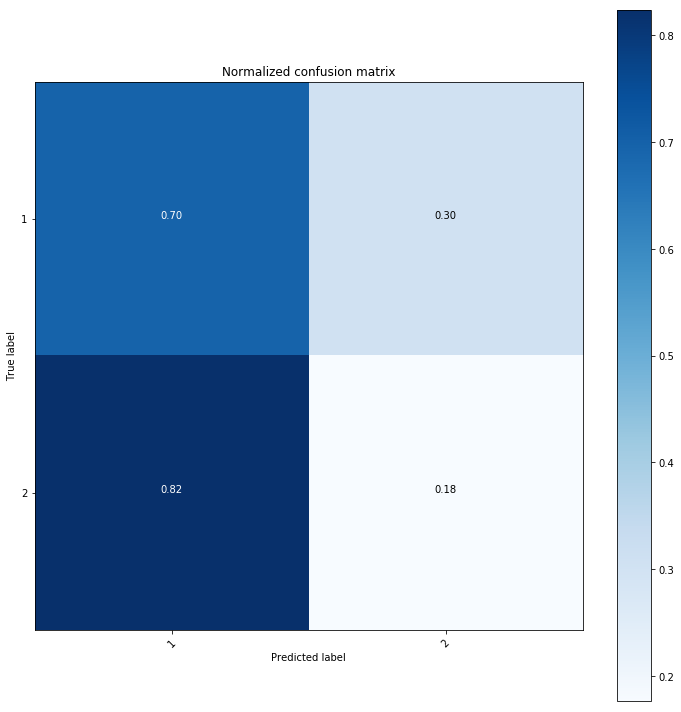

predicting 2 performance


100%|██████████| 704/704 [00:56<00:00, 12.47it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98876404 0.01123596]
 [0.26470588 0.73529412]]


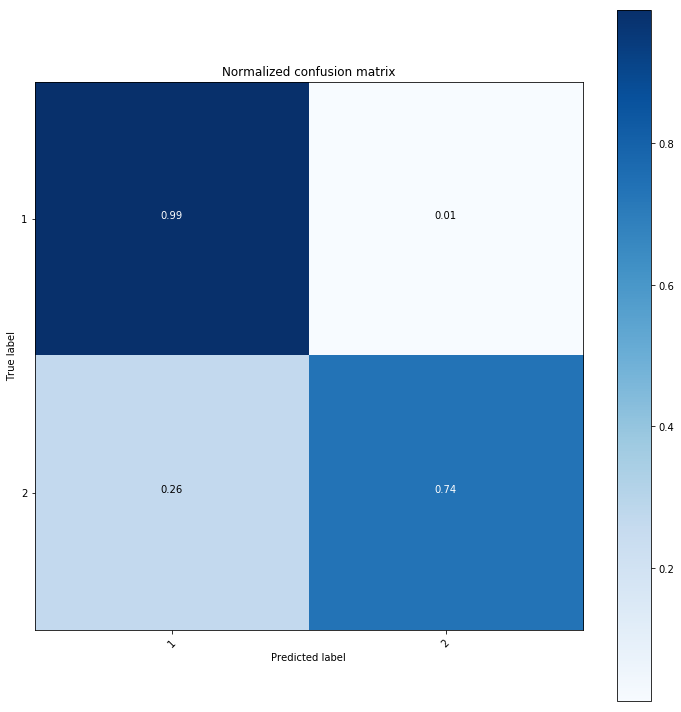

predicting 3 performance


100%|██████████| 704/704 [00:55<00:00, 12.58it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99625468 0.00374532]
 [0.         1.        ]]


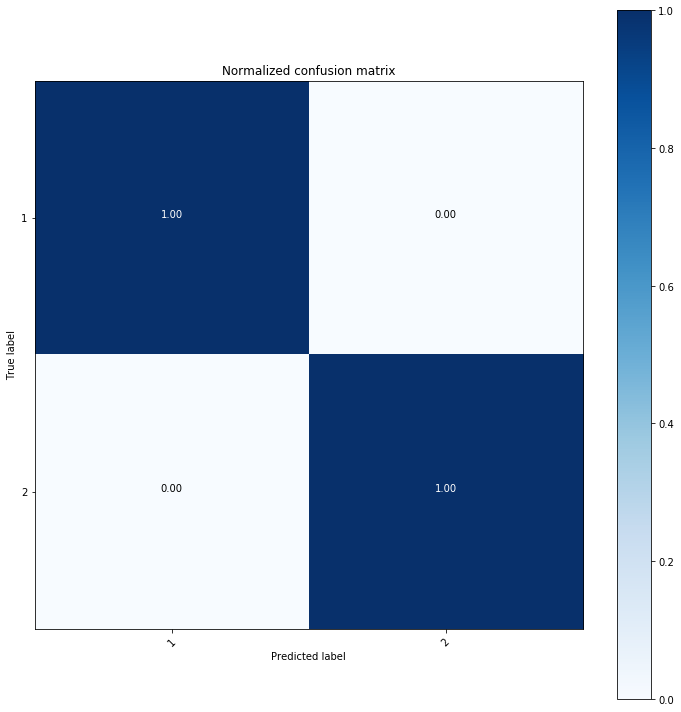

!!!!!!!!! test 4-th drumer !!!!!!!!!!!!
[[-0.15843706 -0.33832962 -0.14823323 ...  1.24000451  0.83625377
   0.61449898]
 [-0.66819821 -0.42377359 -0.6667164  ... -0.35658245 -2.27601669
   0.84520335]
 [-0.37150698 -0.42229352 -0.32358888 ...  0.4954735   0.88061533
   0.65377724]
 ...
 [ 0.55293566 -0.18023162  0.65831763 ...  1.31412341  1.10415171
   1.06440047]
 [ 1.19323908  2.97809386  1.28870582 ... -0.3641197  -0.76729695
   1.31179529]
 [ 0.12996265 -0.41611005  0.22631281 ... -1.64175727  0.84087193
  -1.49938183]]


100%|██████████| 704/704 [00:47<00:00, 14.96it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 704/704 [00:55<00:00, 12.73it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.97003745 0.02996255]
 [0.76470588 0.23529412]]


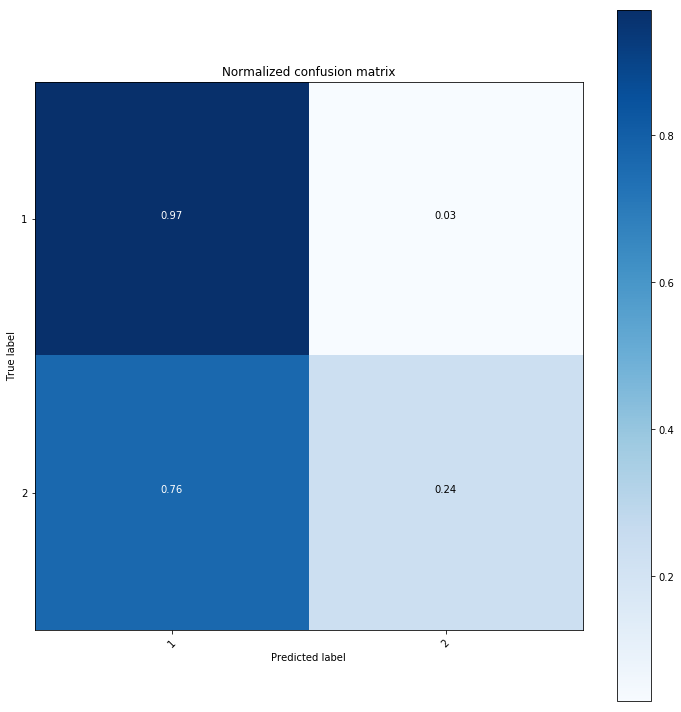

predicting 2 performance


100%|██████████| 704/704 [00:55<00:00, 12.78it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.94756554 0.05243446]
 [1.         0.        ]]


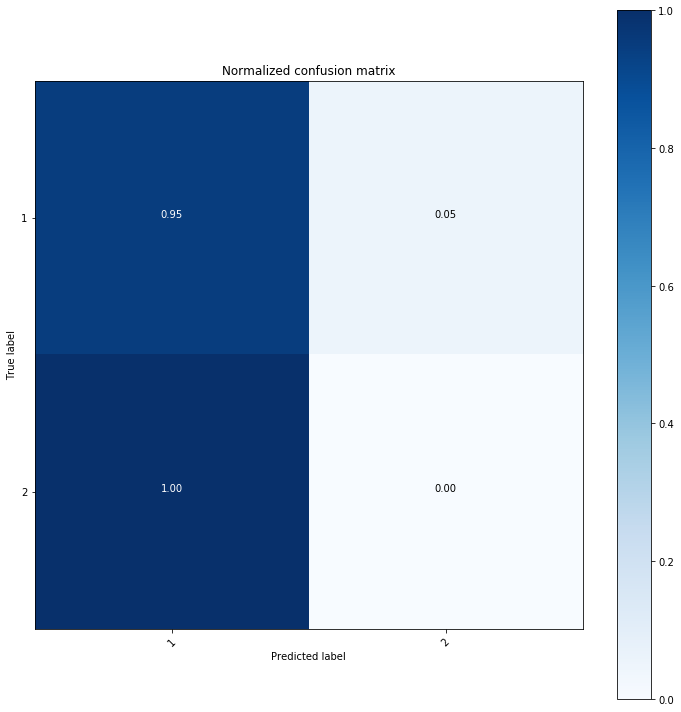

predicting 3 performance


100%|██████████| 704/704 [00:47<00:00, 14.96it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.85294118 0.14705882]]


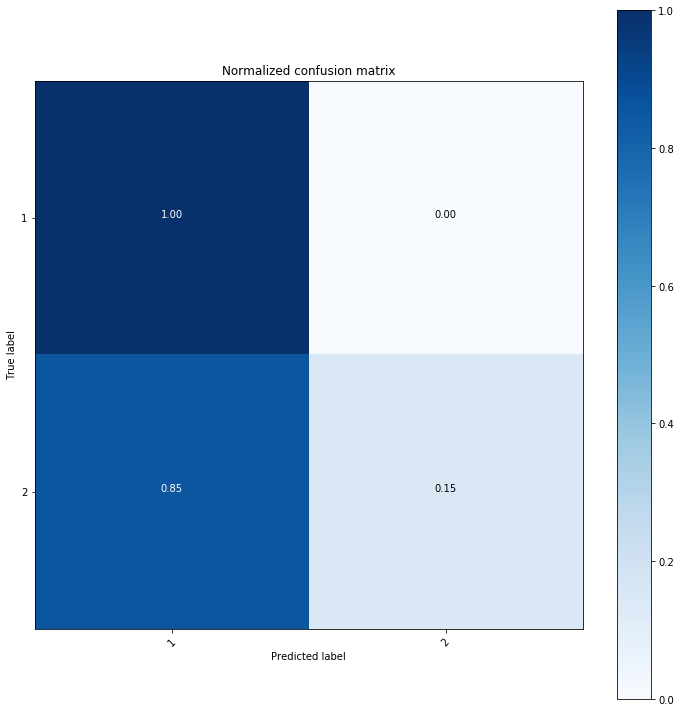

!!!!!!!!! test 5-th drumer !!!!!!!!!!!!
[[-0.04457927 -0.53967255 -0.05627223 ... -1.57860353  0.04411663
   0.4868448 ]
 [-0.57526066 -0.50675382 -0.53842105 ...  1.62425736  1.88617882
   1.48886645]
 [-0.57227615 -0.52711935 -0.50051075 ...  1.10452839  1.97186733
   0.85553198]
 ...
 [ 3.50717877 -0.52675316  2.6786855  ... -0.63822874 -0.12936744
  -1.28710563]
 [ 3.64430967 -0.52175737  2.34715329 ... -0.15857057  0.86231578
   1.39771518]
 [ 3.4674122  -0.54112262  2.09480825 ... -0.04076681  1.9972575
  -0.18770394]]


100%|██████████| 704/704 [00:55<00:00, 12.70it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 704/704 [00:55<00:00, 12.59it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98127341 0.01872659]
 [0.08823529 0.91176471]]


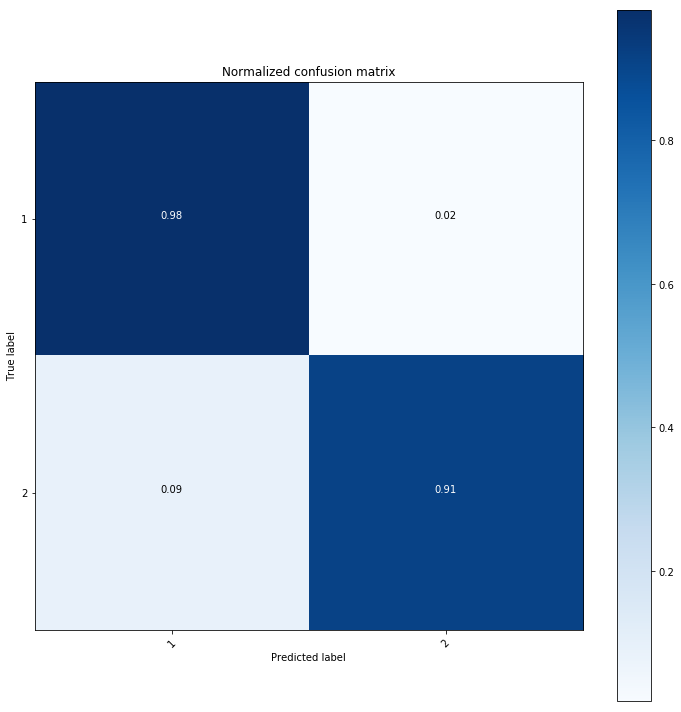

predicting 2 performance


100%|██████████| 704/704 [00:55<00:00, 12.62it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.94382022 0.05617978]
 [0.02941176 0.97058824]]


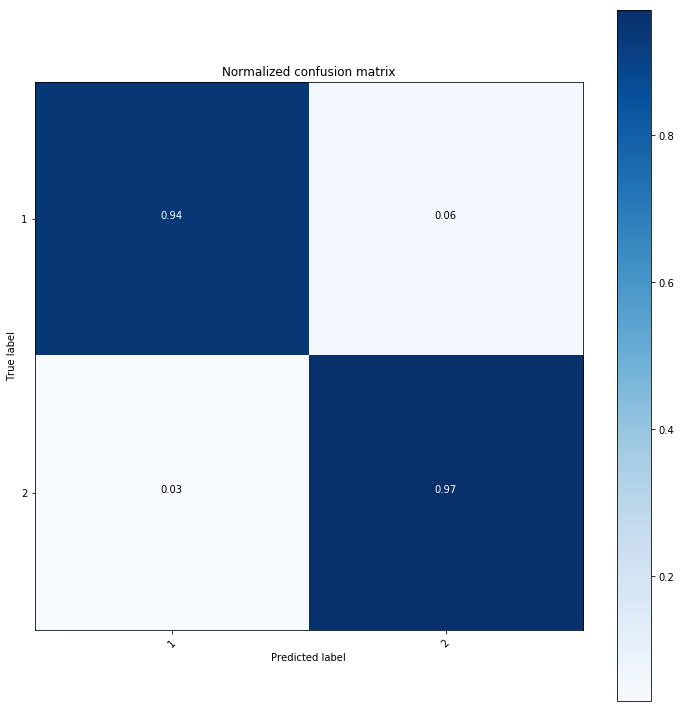

predicting 3 performance


100%|██████████| 704/704 [00:55<00:00, 12.69it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


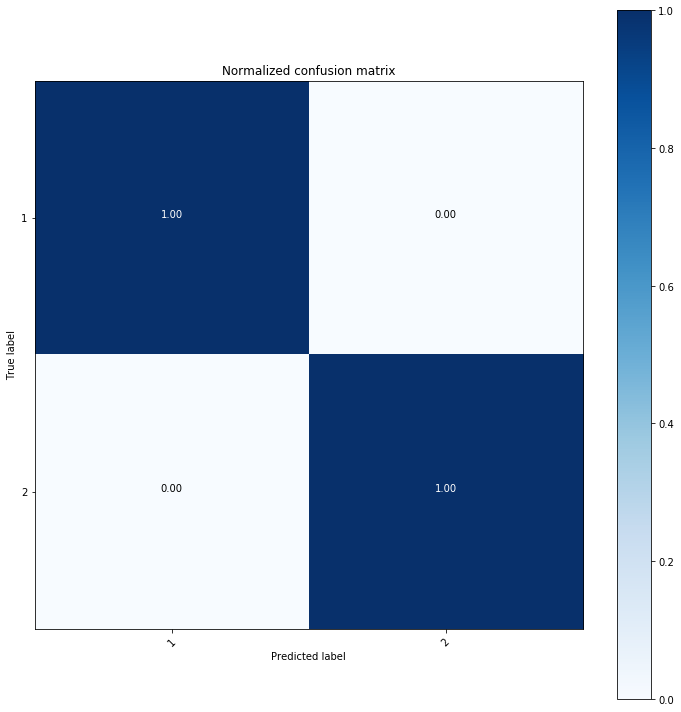

!!!!!!!!! test 6-th drumer !!!!!!!!!!!!
[[ 1.08640817 -0.4988245   1.0638605  ... -1.15210947 -1.26580679
   1.09209711]
 [ 0.05475499 -0.29607401  0.24191906 ... -1.36747475 -1.40780309
   1.15996638]
 [-0.52040656 -0.22294677 -0.6457777  ... -1.20636386 -1.32777391
   1.13831612]
 ...
 [-0.17156035 -0.60182396 -0.19518519 ...  1.37139698  1.16633858
  -0.26656354]
 [-0.0975291  -0.57573194 -0.12431908 ... -0.17469253  0.87752055
  -0.99754956]
 [ 0.23989612 -0.47993699  0.13780648 ...  0.61847626 -0.3745363
  -0.71687882]]


100%|██████████| 704/704 [00:55<00:00, 12.64it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 704/704 [00:55<00:00, 12.67it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99625468 0.00374532]
 [0.38235294 0.61764706]]


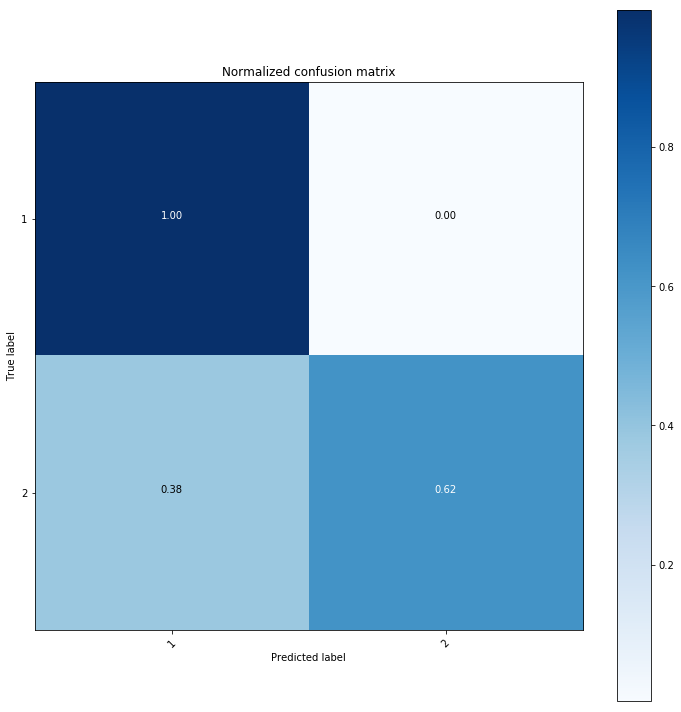

predicting 2 performance


100%|██████████| 704/704 [00:55<00:00, 12.64it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98876404 0.01123596]
 [0.41176471 0.58823529]]


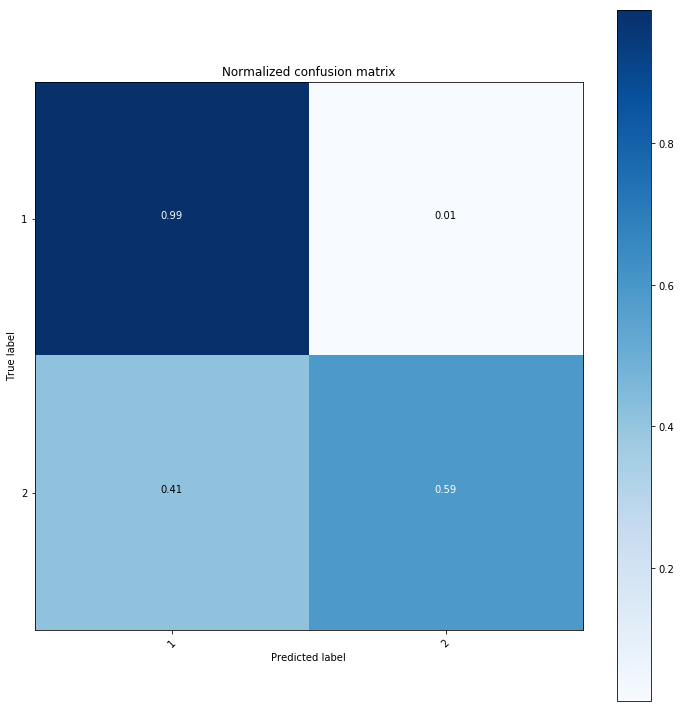

predicting 3 performance


100%|██████████| 704/704 [00:55<00:00, 12.65it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.02941176 0.97058824]]


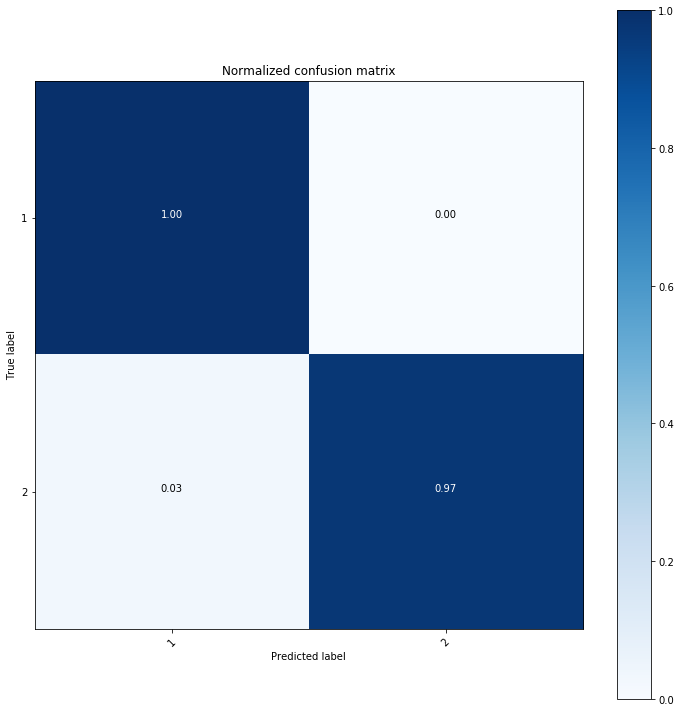

!!!!!!!!! test 7-th drumer !!!!!!!!!!!!
[[ 0.56929203 -0.49428903  0.72969485 ...  1.40598556 -0.70433311
  -0.95848449]
 [ 0.51220563 -0.49051701  0.66483557 ...  0.43482254 -0.19975366
  -0.01915755]
 [ 0.17188175 -0.49245198  0.27167487 ... -0.37722856  1.36687787
  -1.34236973]
 ...
 [-0.19289835 -0.49354344 -0.07342544 ... -1.41284086 -0.9391953
   0.13729423]
 [-0.25301475 -0.48011315 -0.2403018  ... -0.03451417  1.50477935
  -0.48486945]
 [-0.04281591 -0.48532932  0.02603287 ...  1.44382095 -1.56593194
  -1.71188094]]


100%|██████████| 704/704 [00:55<00:00, 12.62it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 704/704 [00:55<00:00, 12.64it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


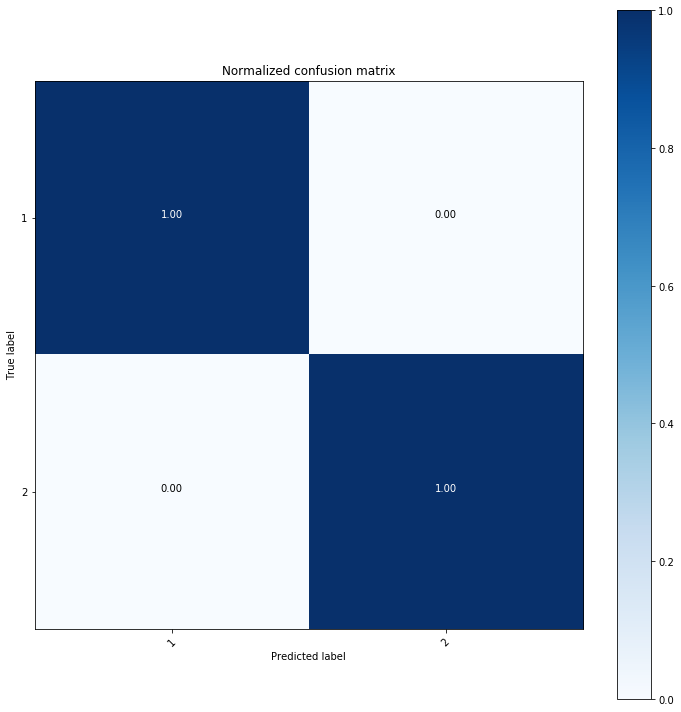

predicting 2 performance


100%|██████████| 704/704 [00:55<00:00, 12.59it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.99625468 0.00374532]
 [0.02941176 0.97058824]]


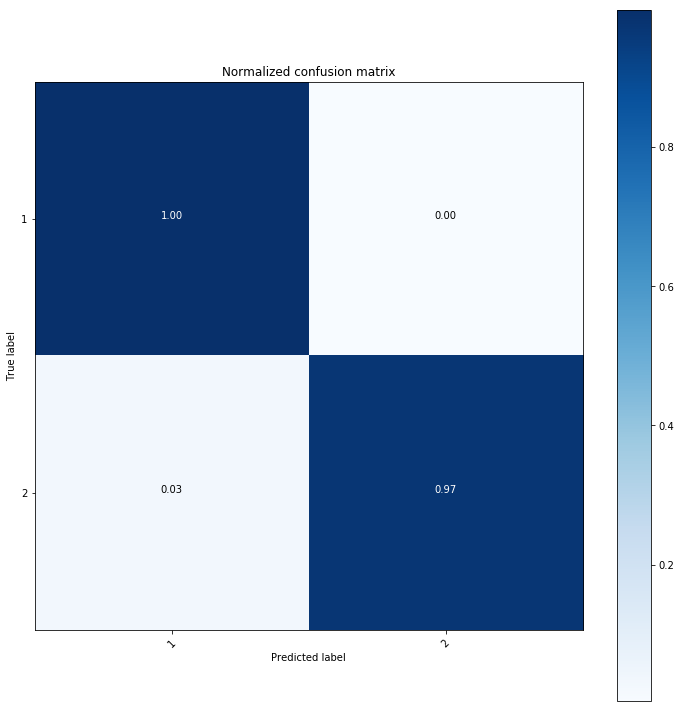

predicting 3 performance


100%|██████████| 704/704 [00:55<00:00, 12.60it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


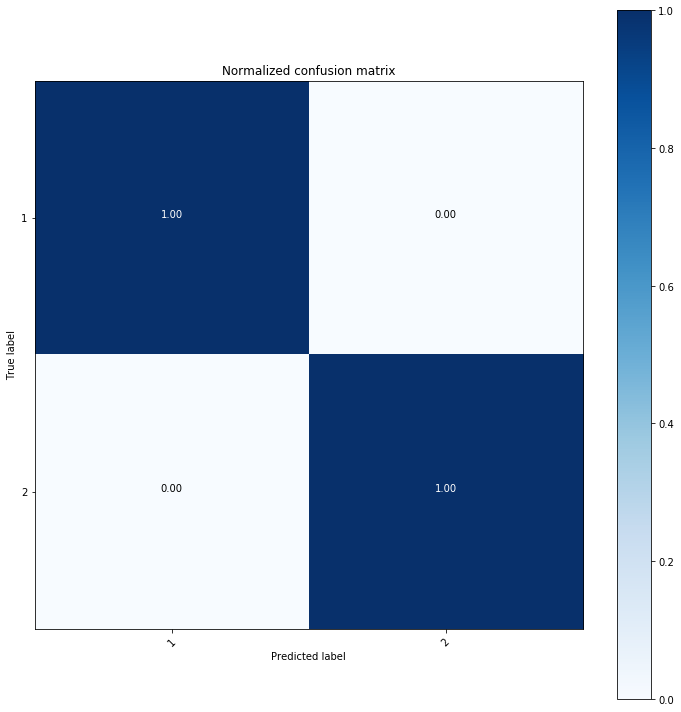

!!!!!!!!! test 8-th drumer !!!!!!!!!!!!
[[ 0.78079044  0.11975625  0.74887207 ... -1.14235365  0.92749107
  -1.15732575]
 [ 1.42901054  0.11637739  1.72081898 ... -0.71412324 -1.3855655
   1.02982945]
 [ 0.56549615  0.02506121  0.54274002 ... -0.01463257 -1.26197159
   0.08840711]
 ...
 [ 0.89159942 -0.33162644  0.9542416  ...  2.10598524  1.68599763
   1.39826658]
 [ 0.55986479 -0.32329681  0.57959471 ...  0.69363647 -0.13321239
   1.30538148]
 [ 0.17928009 -0.17018415  0.30864925 ...  2.13617659  1.565543
   1.12408005]]


100%|██████████| 704/704 [00:54<00:00, 12.96it/s]

let's go centroid=50, C=100.00 @@@@@@@@@@@@@@@
predicting 1 performance



100%|██████████| 704/704 [00:54<00:00, 13.02it/s]


============ prediction arm ============
Normalized confusion matrix
[[0.98876404 0.01123596]
 [0.05882353 0.94117647]]


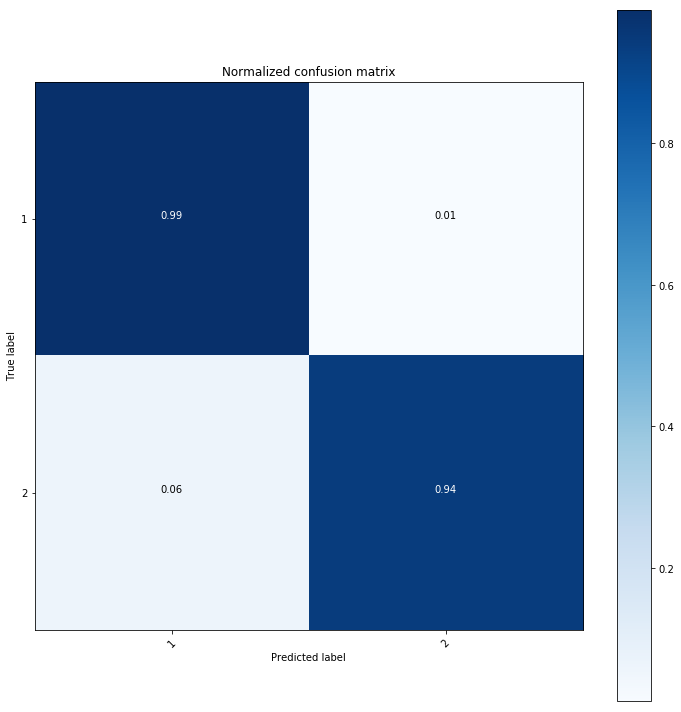

predicting 2 performance


100%|██████████| 704/704 [00:53<00:00, 13.10it/s]


============ prediction arm ============
Normalized confusion matrix
[[1.         0.        ]
 [0.08823529 0.91176471]]


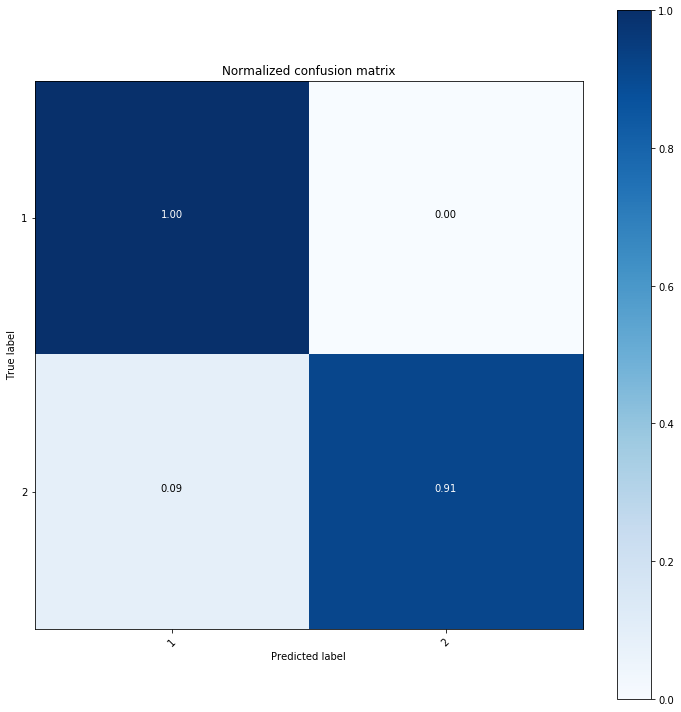

predicting 3 performance


100%|██████████| 704/704 [00:54<00:00, 13.02it/s]


============ prediction arm ============
Normalized confusion matrix
[[1. 0.]
 [0. 1.]]


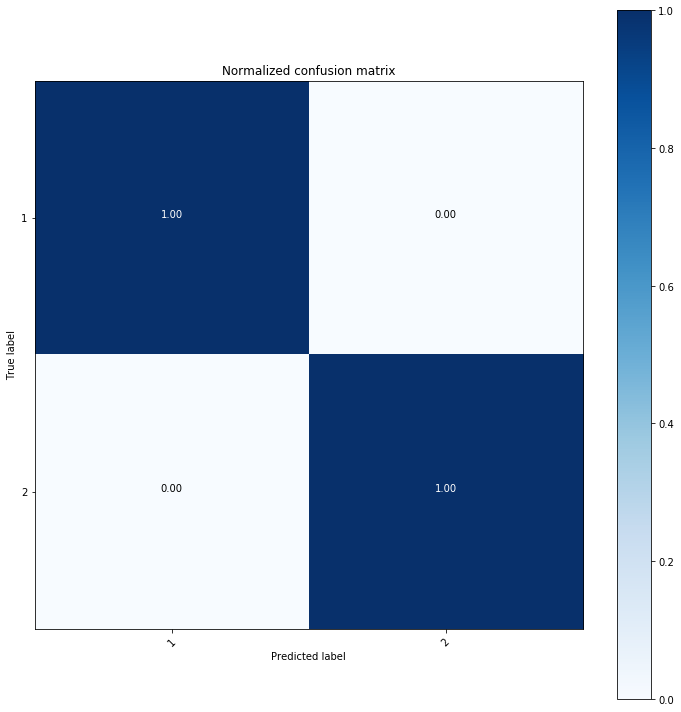

In [9]:
k = 50
C = 100

for drumer in range(1, 8 + 1):
    print('!!!!!!!!! test %d-th drumer !!!!!!!!!!!!' % drumer)
    model = Model(k_centroid=k, tolerance=C)
    model.fit(pfs[drumer - 1][TRAIN_ORDER - 1])
    print('let\'s go centroid=%d, C=%.2f @@@@@@@@@@@@@@@' % (k, C))
    for od in range(len(pfs[drumer - 1])):
        print('predicting %d performance' % (od + 1))
        pred_y, y = model.predict(pfs[drumer - 1][od])
        print('============ prediction arm ============')
        cutstom_output_cnf_matrix(y, pred_y)